<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Regression Models Polynomial Regression and Regularization

**Polynomial Regression for Modeling Non-Linear Relationships**

Polynomial Regression is an extension of linear regression that models non-linear relationships by introducing higher-order terms of the input features

- What is Polynomila Regression?

  - In a typical LLinear Regression

  y=B0+b1x+E

  - In polynomial Regression, we extend this to include higher degree terms

  y=B0+B1x+B2x^2+B3x^3+...+Bnx^n+E

**Polynomial Regression for Modeling Non-LInear Relationships**

- Steps in Polynomial Regression

  1.Feature Transformation

    - Create Polynomial features from the Original input data

    - Example:x-->[x, x^2, x^3]

  2.Model Training

    - Perform Linear Regression on the transformed features

  3.Evaluation

    - Assess the model's ability to capture the data's non linear structure

- Advantages

  - Captures Non-Linear Relationships effectively

- Limitations

  - Prone to ovefitting with high-degree polynomials

  - May require regularization to avoid ovefitting

- Example use case: Predicting growth patterns in biological systems where relationships are non-linear



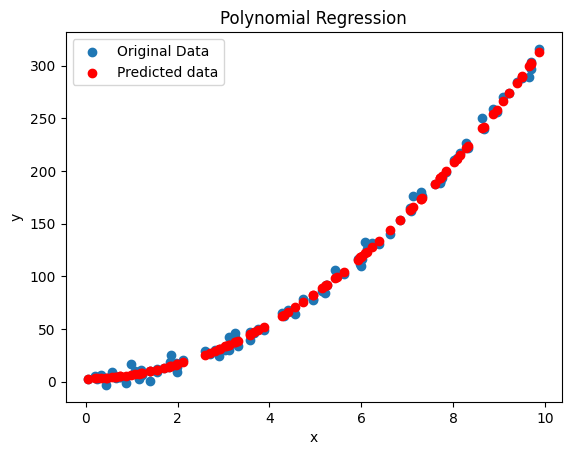

Mean Squared Error: 
 19.4298416587559


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate Synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X ** 2 + 2 * X + np.random.randn(100, 1) * 5

# Transform Features to Polynomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit Polynomial Regression
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot results
plt.scatter(X, y, label='Original Data')
plt.scatter(X, y_pred, color='red', label='Predicted data')
plt.title("Polynomial Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Evaluate Model
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error: \n", mse)

**Introduction to Regualrization Techniques: Lasso and Ridge Regression**

- What is Regularization?

  - Technique used to prevent overfitting by adding a penalty term to the cost function of a regression model

- Types of Regularization

- Ridge Regression(L2 Regularization)

    - Adds the sum of the squared coeffcient to the cost function

    - $\lambda$ parameter controls the strength of the cost function

$$J(β) = (1 / (n)) * Σ (yᵢ − ŷᵢ)²  +  λΣ βⱼ²$$

  - Lasso Regression(L1 Regularization)

    - Adds the sum of the absolute coefficients to the cost function

    - Encourages the sparsity in the coefficients, effectively performing feature selection

$$J(β) = (1 / (n)) * Σ (yᵢ − ŷᵢ)²  +  λΣ |βⱼ|$$

- Key Features

  - Ridge shrinks coefficients but does not eliminate them

  - Lasso can shrink some coefficients to zero, removing irrelevant features


     


**Avoid Overfitting with Regularization**

- Regularization reduces the risk of controlling the complexity of the model

- The regularization parameter $\lambda$(also called $\alpha$ in some libraries)plays a crucial role:

  - A high $\lambda$ value increases the penalty, forcing smaller coefficients and reducing overfitting

  - A low $\lambda$ value allows the model to fit the training data more closely, increasing the risk of overfitting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate Synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X ** 2 + 2 * X + np.random.randn(100, 1) * 5

# Transform Features to Polynomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Evaluate Ridge
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Regression MSE: \n", ridge_mse)

# Evaluate Lasso
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso Regression MSE: \n", lasso_mse)

Ridge Regression MSE: 
 15.895943348652818
Lasso Regression MSE: 
 15.914000425089279


**Implement Polynomial Regression and visualize the fit**

Ridge Regression MSE: 
 0.7032732202728617
Lasso Regression MSE: 
 0.7211823140579731


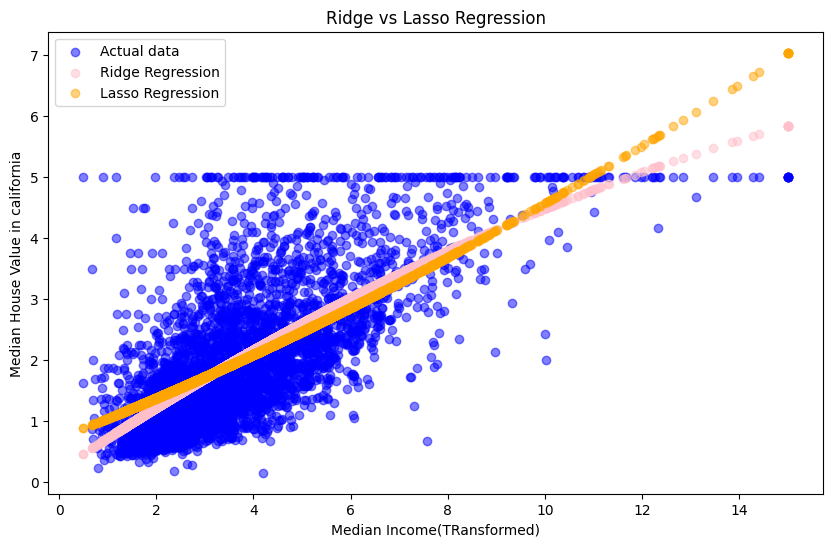

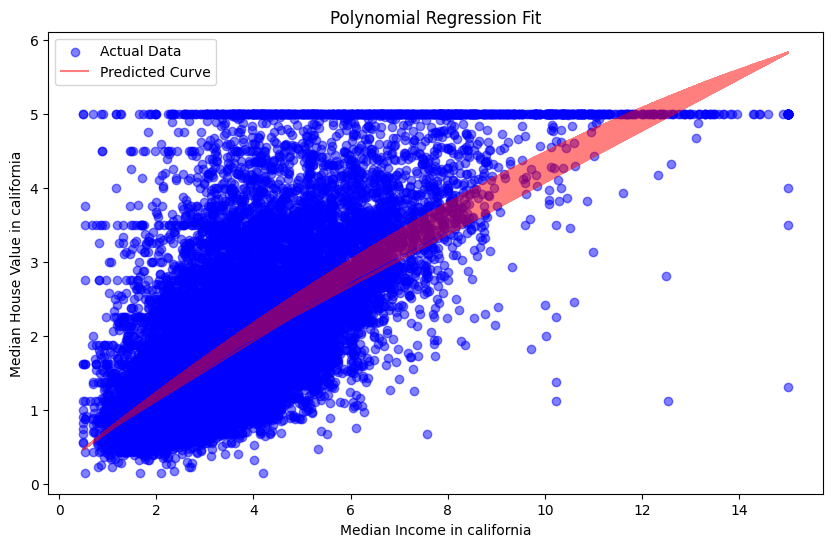

Mean Squared Error: 
 0.695037253723973


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the california Housing dataset
data = fetch_california_housing(as_frame = True)
df = data.frame

# Selct feature(Median Income)and Target(Medain House value)
x = df[["MedInc"]]
y = df[["MedHouseVal"]]

# Transform feature to polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Regression MSE: \n", ridge_mse)

# Evaluate Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso Regression MSE: \n", lasso_mse)

# Visualize Ridge vs Lasso
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color = "blue", label = "Actual data", alpha = 0.5)
plt.scatter(X_test[:, 0], ridge_predictions, color = "pink", label = "Ridge Regression", alpha = 0.5)
plt.scatter(X_test[:, 0], lasso_predictions, color = "orange", label = "Lasso Regression", alpha = 0.5)
plt.title("Ridge vs Lasso Regression")
plt.xlabel("Median Income(TRansformed)")
plt.ylabel("Median House Value in california")
plt.legend()
plt.show()

# Fit Polynomial Regression model
model = LinearRegression()
model.fit(x_poly, y)

# Make Predictions
y_pred = model.predict(x_poly)

# Plot actual values vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color = "blue", label = "Actual Data", alpha = 0.5)
plt.plot(x, y_pred, color = "red", label = "Predicted Curve", alpha = 0.5)
plt.title("Polynomial Regression Fit")
plt.xlabel("Median Income in california")
plt.ylabel("Median House Value in california")
plt.legend()
plt.show()

# Evaluate model perfomance
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error: \n", mse)

**Additional Experiments**

> Vary Regularization parameters:

- Experiment with different values of $\alpha$(EX:0.1, 1, 10)for Ridge and Lasso Regression and observe how the model's coefficients and perfomance change

Ridge Regression MSE: 
 0.7032732202728617
Lasso Regression MSE: 
 0.7211823140579731


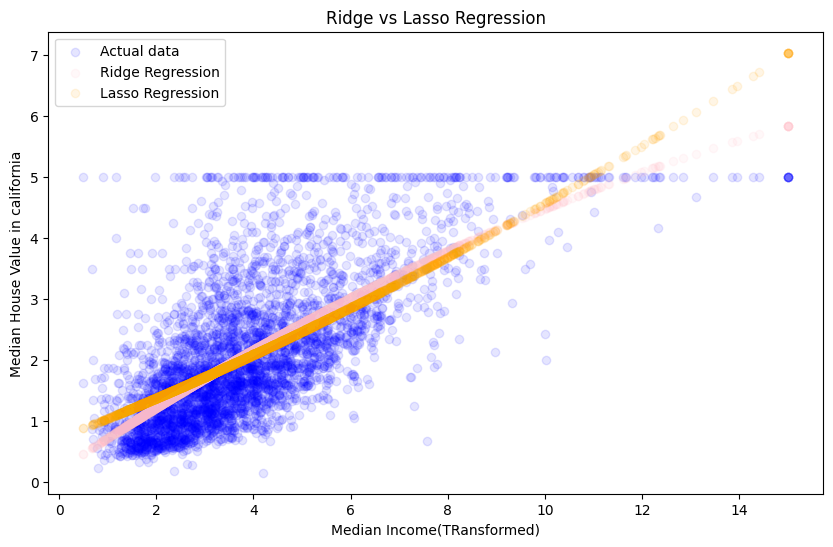

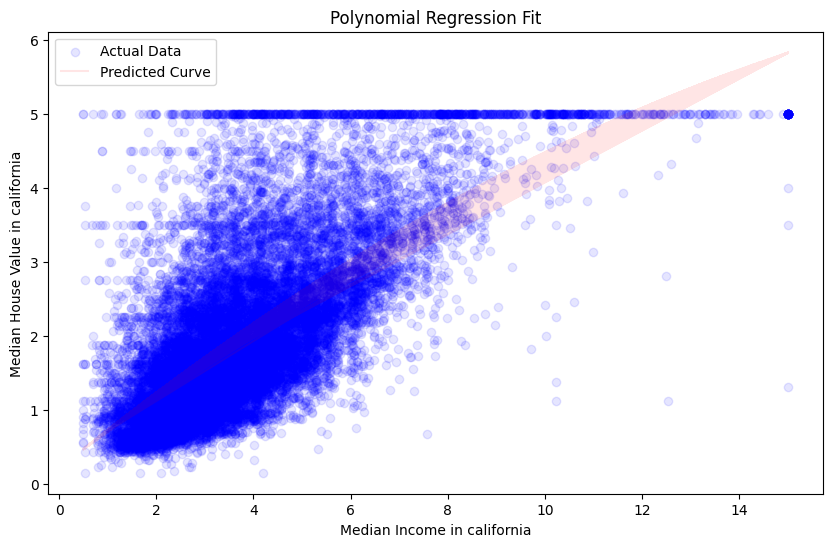

Mean Squared Error: 
 0.695037253723973


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the california Housing dataset
data = fetch_california_housing(as_frame = True)
df = data.frame

# Selct feature(Median Income)and Target(Medain House value)
x = df[["MedInc"]]
y = df[["MedHouseVal"]]

# Transform feature to polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Regression MSE: \n", ridge_mse)

# Evaluate Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso Regression MSE: \n", lasso_mse)

# Visualize Ridge vs Lasso
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color = "blue", label = "Actual data", alpha = 0.1)
plt.scatter(X_test[:, 0], ridge_predictions, color = "pink", label = "Ridge Regression", alpha = 0.1)
plt.scatter(X_test[:, 0], lasso_predictions, color = "orange", label = "Lasso Regression", alpha = 0.1)
plt.title("Ridge vs Lasso Regression")
plt.xlabel("Median Income(TRansformed)")
plt.ylabel("Median House Value in california")
plt.legend()
plt.show()

# Fit Polynomial Regression model
model = LinearRegression()
model.fit(x_poly, y)

# Make Predictions
y_pred = model.predict(x_poly)

# Plot actual values vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color = "blue", label = "Actual Data", alpha = 0.1)
plt.plot(x, y_pred, color = "red", label = "Predicted Curve", alpha = 0.1)
plt.title("Polynomial Regression Fit")
plt.xlabel("Median Income in california")
plt.ylabel("Median House Value in california")
plt.legend()
plt.show()

# Evaluate model perfomance
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error: \n", mse)

> Use multiple Features:

  - Include more features(Ex: Houseage, AveRooms) and Observe th impact on model perfomance

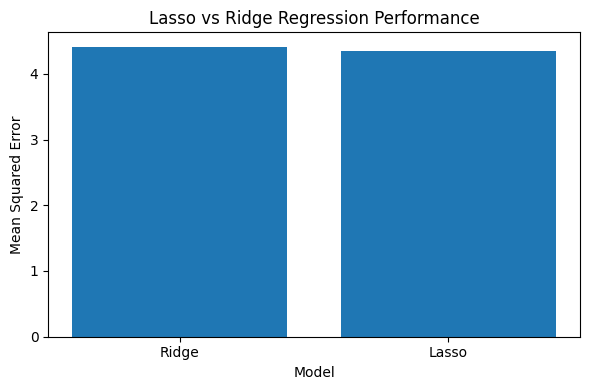


===== Lasso Coefficients =====
MedInc: 0.7364
HouseAge: 0.2011
AveRooms: 0.5238
AveBedrms: 0.1212
Population: -29.0342
AveOccup: 0.0190
Latitude: 0.0000
Longitude: -0.0000

===== Ridge Coefficients =====
MedInc: 0.8468
HouseAge: 0.2984
AveRooms: 0.6030
AveBedrms: 0.1469
Population: -29.0547
AveOccup: 0.1113
Latitude: 0.0217
Longitude: -0.0139


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Create synthetic dataset similar to Cali Housing
np.random.seed(42)
n_samples = 500

# Features (8 features)
MedInc = np.random.normal(5, 1, n_samples)
HouseAge = np.random.normal(30, 10, n_samples)
AveRooms = np.random.normal(5, 2, n_samples)
AveBedrms = AveRooms/2 + np.random.normal(0, 0.5, n_samples)
Population = np.random.normal(1500, 300, n_samples)
AveOccup = np.random.normal(3, 1, n_samples)
Latitude = np.random.uniform(32, 42, n_samples)
Longitude = np.random.uniform(-124, -114, n_samples)

# Combine features
X = np.column_stack([MedInc, HouseAge, AveRooms, AveBedrms,
                     Population, AveOccup, Latitude, Longitude])

# Target variable (y)
y = (0.8*MedInc + 0.02*HouseAge + 0.3*AveRooms -
     0.1*Population + 0.2*AveOccup + np.random.normal(0, 2, n_samples))

feature_names = ["MedInc", "HouseAge", "AveRooms", "AveBedrms",
                 "Population", "AveOccup", "Latitude", "Longitude"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Plot MSE for Ridge vs Lasso
models = ["Ridge", "Lasso"]
mses = [ridge_mse, lasso_mse]

plt.figure(figsize=(6,4))
plt.bar(models, mses)
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("Lasso vs Ridge Regression Performance")
plt.tight_layout()
plt.show()

# Print coefficients
print("\n===== Lasso Coefficients =====")
for f, c in zip(feature_names, lasso.coef_):
    print(f"{f}: {c:.4f}")

print("\n===== Ridge Coefficients =====")
for f, c in zip(feature_names, ridge.coef_):
    print(f"{f}: {c:.4f}")


> Feature importance with Lasso:

  - Use Lasso regression to perform feature selection and identify the most relevant predictors

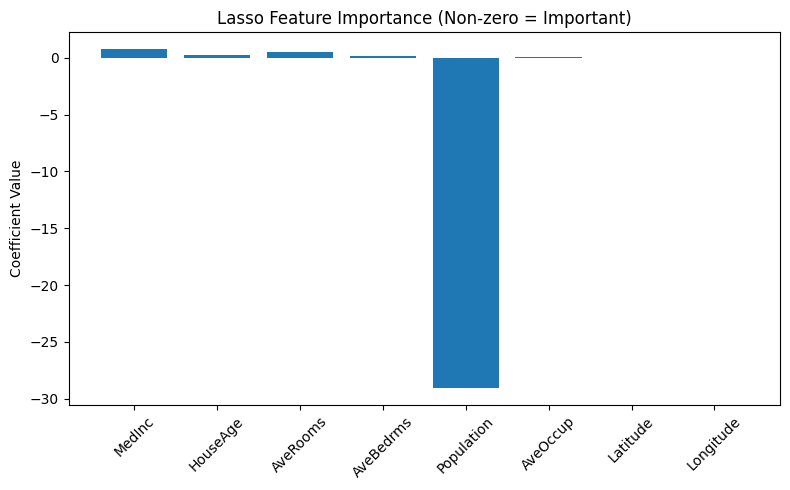

===== Lasso Feature Importance =====
MedInc: 0.7364
HouseAge: 0.2011
AveRooms: 0.5238
AveBedrms: 0.1212
Population: -29.0342
AveOccup: 0.0190
Latitude: 0.0000
Longitude: -0.0000


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Create synthetic dataset (8 features)
np.random.seed(42)
n = 500

MedInc = np.random.normal(5, 1, n)
HouseAge = np.random.normal(30, 10, n)
AveRooms = np.random.normal(5, 2, n)
AveBedrms = AveRooms/2 + np.random.normal(0, 0.5, n)
Population = np.random.normal(1500, 300, n)
AveOccup = np.random.normal(3, 1, n)
Latitude = np.random.uniform(32, 42, n)
Longitude = np.random.uniform(-124, -114, n)

X = np.column_stack([MedInc, HouseAge, AveRooms, AveBedrms,
                     Population, AveOccup, Latitude, Longitude])

# true target
y = (0.8*MedInc + 0.02*HouseAge + 0.3*AveRooms -
     0.1*Population + 0.2*AveOccup + np.random.normal(0, 2, n))

feature_names = ["MedInc", "HouseAge", "AveRooms", "AveBedrms",
                 "Population", "AveOccup", "Latitude", "Longitude"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Scale data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Lasso Regression for Feature Selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_s, y_train)

# Coefficients
lasso_coeffs = lasso.coef_

# Plot Feature Importance
plt.figure(figsize=(8,5))
plt.bar(feature_names, lasso_coeffs)
plt.title("Lasso Feature Importance (Non-zero = Important)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print feature importance clearly
print("===== Lasso Feature Importance =====")
for f, c in zip(feature_names, lasso_coeffs):
    print(f"{f}: {c:.4f}")